<a href="https://colab.research.google.com/github/noelmt7/LAB_2/blob/main/2348538_Noel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [4]:
df = pd.read_csv('/content/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
df=df.drop(columns=['Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling', 'Checkin service', 'Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes'])
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 9.9+ MB


In [8]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
dtype: int64

In [9]:
age_bin_edges = [18,25, 35, 45, np.inf]
age_bin_labels = ['Young', 'Middle-Aged-Adults', 'Older-adults','senior-citizens']


In [10]:
df1 = df.copy()
df1['Age_Category'] = pd.cut(df['Age'], bins=age_bin_edges, labels=age_bin_labels)

In [11]:
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Age_Category
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,senior-citizens
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,senior-citizens
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,NaN
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,senior-citizens
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,senior-citizens


In [12]:
age_group_count = df1['Age_Category'].value_counts().sort_index()

<ipython-input-13-cb38f737c0e3>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('inferno')


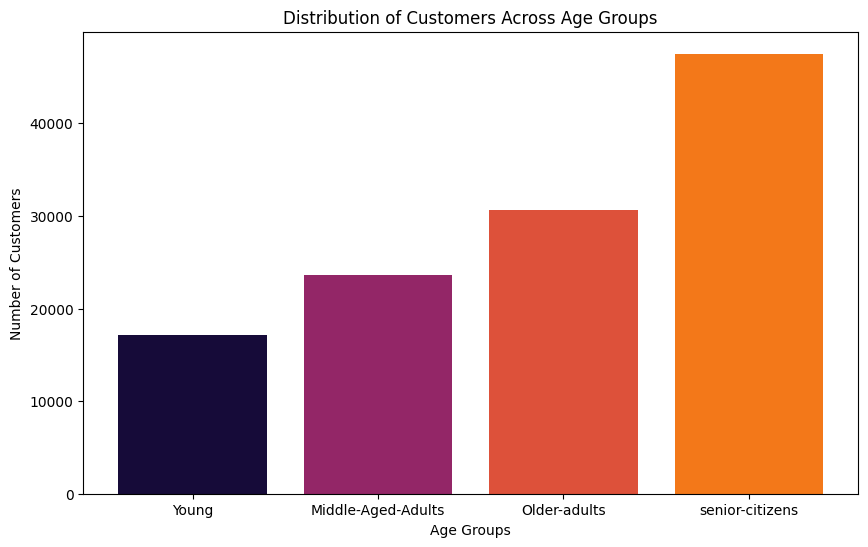

In [13]:

colormap = cm.get_cmap('inferno')

colors = [colormap(0.1), colormap(0.4), colormap(0.6), colormap(0.7)]

plt.figure(figsize=(10, 6))
plt.bar(age_bin_labels, age_group_count, color=colors)
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Age Groups')
plt.show()


In [14]:
df1['Repeated Purchases'] = np.random.randint(0, 11, size=len(df1))

In [15]:
df1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Age_Category,Repeated Purchases
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,senior-citizens,3
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,senior-citizens,7
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,NaN,4
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,senior-citizens,5
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,senior-citizens,5
...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,Middle-Aged-Adults,1
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,senior-citizens,8
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,senior-citizens,7
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,senior-citizens,7


In [16]:
from sklearn.preprocessing import LabelEncoder

In [19]:
Label_Encoder = LabelEncoder()
df1_copy = df1.copy()
df1_copy.rename(columns={'satisfaction': 'Customer Rating'}, inplace=True)

df1_copy['Gender'] = Label_Encoder.fit_transform(df1_copy['Gender'])
df1_copy ['Customer Rating'] = Label_Encoder.fit_transform(df1_copy['Customer Rating'])
df1_copy['Customer Type'] = Label_Encoder.fit_transform(df1_copy['Customer Type'])
df1_copy['Class'] = Label_Encoder.fit_transform(df1_copy['Class'])

In [20]:
df1_copy


,Customer Rating,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Age_Category,Repeated Purchases
0,1,0,0,65,Personal Travel,1,265,0,0,0,senior-citizens,3
1,1,1,0,47,Personal Travel,0,2464,0,0,0,senior-citizens,7
2,1,0,0,15,Personal Travel,1,2138,0,0,0,NaN,4
3,1,0,0,60,Personal Travel,1,623,0,0,0,senior-citizens,5
4,1,0,0,70,Personal Travel,1,354,0,0,0,senior-citizens,5
...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,Personal Travel,1,1731,5,5,5,Middle-Aged-Adults,1
129876,0,1,1,63,Personal Travel,0,2087,2,3,2,senior-citizens,8
129877,0,1,1,69,Personal Travel,1,2320,3,0,3,senior-citizens,7
129878,0,1,1,66,Personal Travel,1,2450,3,2,3,senior-citizens,7


In [21]:
age_satisfaction_data = df1_copy[['Gender', 'Customer Rating']]
cov_matrix = np.cov(age_satisfaction_data, rowvar=False)

cov_matrix

array([[ 0.2499474 , -0.05281541],
       [-0.05281541,  0.24776194]])

**THERE IS WEAK CORRELATION BETWEEN THE VARIABLES**

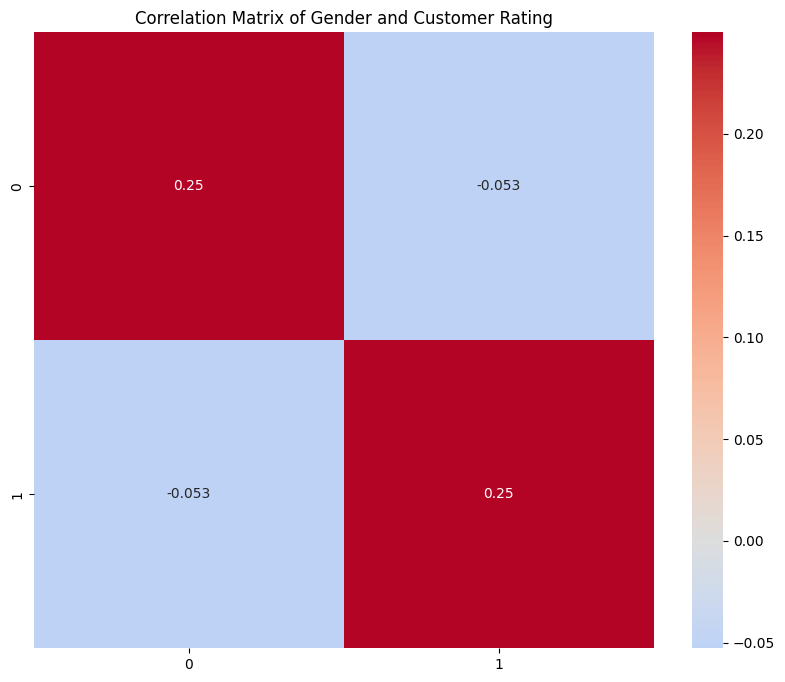

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Gender and Customer Rating')
plt.show()

In [23]:
# Covariance matrix of various Categorical data

gender_customer_ty = df1_copy[['Gender', 'Customer Type', 'Age','Class']]
cov_matrix1 = np.cov(gender_customer_ty, rowvar=False)

cov_matrix1

array([[ 2.49947405e-01, -5.98568429e-03,  6.80010653e-02,
        -3.59553769e-03],
       [-5.98568429e-03,  1.49570525e-01, -1.66164513e+00,
         1.03321121e-02],
       [ 6.80010653e-02, -1.66164513e+00,  2.28595045e+02,
        -1.09845871e+00],
       [-3.59553769e-03,  1.03321121e-02, -1.09845871e+00,
         3.86110990e-01]])

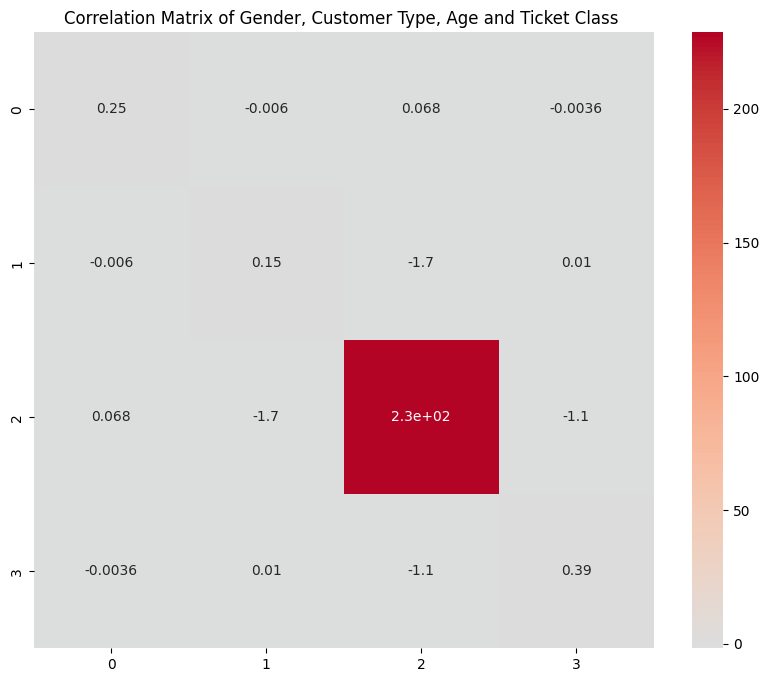

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Gender, Customer Type, Age and Ticket Class ')
plt.show()

In [25]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df1_copy['Gender'], df1_copy['Repeated Purchases'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Value:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Value: 8.139150340208783
P-value: 0.6152469733102526
Degrees of Freedom: 10
Expected Frequencies Table:
[[6032.28527102 5973.93614105 5998.79794426 5934.86759316 6015.54160764
  6009.96038651 6023.15236372 5995.75364182 5970.89183862 6017.57114259
  5926.2420696 ]
 [5856.71472898 5800.06385895 5824.20205574 5762.13240684 5840.45839236
  5835.03961349 5847.84763628 5821.24635818 5797.10816138 5842.42885741
  5753.7579304 ]]


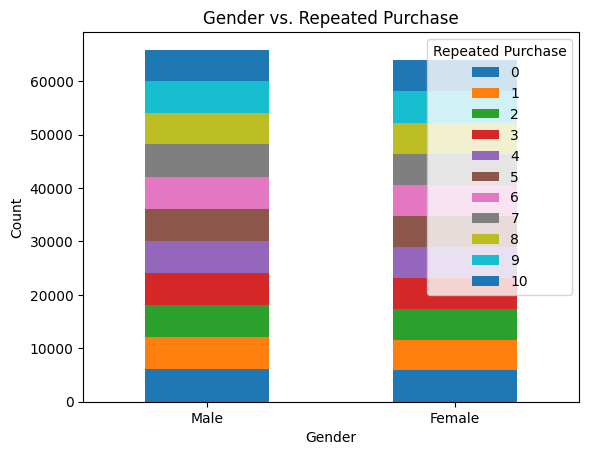

In [26]:
contingency_table = pd.crosstab(df1_copy['Gender'], df1_copy['Repeated Purchases'])

# Plotting the contingency table
ax = contingency_table.plot(kind='bar', stacked=True)
plt.title("Gender vs. Repeated Purchase")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Repeated Purchase")

# Change the x-axis labels to 'Male' and 'Female'
ax.set_xticklabels(['Male', 'Female'], rotation=0)

plt.show()

**T-Test of customer rating and Repeated purchases**

In [27]:
from scipy.stats import ttest_ind

repeated_purchases = df1_copy[df1_copy['Repeated Purchases'] == 1]['Customer Rating']
non_repeated_purchases = df1_copy[df1_copy['Repeated Purchases'] == 0]['Customer Rating']


t_statistic, p_value = ttest_ind(repeated_purchases, non_repeated_purchases)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the p-value is below a significance level (e.g., 0.05) to determine statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference.")
else:
    print("There is no statistically significant difference.")

T-Statistic: 0.23456229332625275
P-Value: 0.8145505082545642
There is no statistically significant difference.
